## Introduction

In this project, we will explore the thriving online retail sector by analyzing a transactional dataset from a Pet Store. We aim to derive insights that will enhance marketing strategies and boost sales. We will follow the OSEMN framework (Obtain, Scrub, Explore, Model, iNterpret) to transform raw transactional data into actionable intelligence. The dataset covers all transactions between 2019 and 2021. Our main objectives are to conduct a detailed product analysis to support marketing efforts and to perform customer segmentation in order to develop personalized recommendations.

### Objectives
Product Analysis: Determine the total number of product categories sold within each product line (cat & dog).
Customer Segmentation: Use the K-means clustering algorithm to segment customers based on purchasing behavior.
Recommendation System: Develop a system to recommend top-selling products to customers within each segment who haven’t purchased those items yet.


##### Stage 1: Obtain
 -	Loading the Dataset
 -	Initial Data Inspection
##### Stage 2: Scrub
 - Data Cleaning
 - Handling Missing Values
 - Data Type Conversions
 - Removing Duplicates
 - Handling Outliers
 - Data Transformation
 - Feature Engineering
##### Stage 3: Explore
 - Descriptive Statistics
 -	Data Visualization
 -	Distribution of Sales by Date
 -	Top-Selling Products
 -	Sales Distribution by Product Line
 -	Correlation Analysis
##### Stage 4: Model
 -	Customer Segmentation using K-Means Clustering
 -	Product Analysis for Marketing Effort
 -	Total Number of Product Categories by Product Line
 -	Recommendation System
##### Stage 5: iNterpret
 -	Summarizing Findings
 -	Insights and Recommendations
 -  Conclusion
 -  Summary of Analysis


First of all, I will import all the necessary libraries that we will use throughout the project. This generally includes libraries for data manipulation, data visualization, and others based on the specific needs of the project:

In [1047]:
import pandas as pd 
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


## OSEMN 


###   Step 1: Obtain 

#### Check the validity and Load Dataset
This set of transaction data illustrates a first-party dataset; the information is collected directly from the company's consumers. I have verified the accuracy of the dataset and confirmed its high quality. I will load it for review and gain an initial understanding of the data.

In [1048]:
#Loading the dataset 
df = pd.read_csv('transactions-pet_store.csv')

#Display the first 5 rows of the datasets
df.head()

,Date,Order_Number,Customer_ID,Product_Name,SKU,Price,Size,Quantity,Product_Category,Product_Line
0,5/22/2021,SXF-7309-1727-1334,476582ea-1bba-4289-8775-3fcd8074821c,Feline Fix Mix,RKAPY3I1TP,39.55,NaN,1,treat,cat
1,5/22/2021,SXF-7309-1727-1334,476582ea-1bba-4289-8775-3fcd8074821c,Scratchy Post,MPH6SCD7UT,26.95,NaN,3,toy,cat
2,5/22/2021,SXF-7309-1727-1334,476582ea-1bba-4289-8775-3fcd8074821c,Reddy Beddy,DJWE1V9LZK,23.07,large,3,bedding,dog
3,3/23/2020,DG7-5410-5845-1340,5929a0e9-95a7-4dbf-896e-c11d1988615e,Snoozer Essentails,GABWVMEL2R,28.04,NaN,3,bedding,dog
4,3/23/2020,DG7-5410-5845-1340,5929a0e9-95a7-4dbf-896e-c11d1988615e,Reddy Beddy,KDTMPSBZKZ,13.84,small,1,bedding,dog



#### Initial Data Inspection 

This transaction dataset represents a first-party dataset, meaning the information is collected directly from the company's consumers. I have verified the accuracy of the dataset and confirmed its high quality. I will load it for review to gain an initial understanding of the data.

In [1049]:
print()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2903 entries, 0 to 2902
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              2903 non-null   object 
 1   Order_Number      2903 non-null   object 
 2   Customer_ID       2853 non-null   object 
 3   Product_Name      2874 non-null   object 
 4   SKU               2903 non-null   object 
 5   Price             2903 non-null   float64
 6   Size              658 non-null    object 
 7   Quantity          2903 non-null   int64  
 8   Product_Category  2758 non-null   object 
 9   Product_Line      2901 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 226.9+ KB


The dataset includes 2,903 entries, with 10 columns capturing various aspects of transactions, such as:

In [1050]:
#Creeate Dataframe for variable description 
variable_overview = {
    'Variable': ['Date', 'Order_Number', 'Customer_ID', 'Product_Name', 'SKU', 'Price', 'Size', 'Quantity', 'Product_Category', 'Product_Line'],
    'Description': [
        'The date of the transaction',
        'A unique identifier for each order',
        'A unique identifier for each customer',
        'The name of the product purchased',
        'The stock-keeping unit for the product',
        'The price of the product',
        'The size of the product (if applicable)',
        'The number of units purchased',
        'The category of the product',
        'Whether the product is for cats or dogs'
    ]
}
df_variable_overview = pd.DataFrame(variable_overview)

df_variable_overview.style.set_properties(**{'text-align': 'left'}).hide(axis='index')




Variable,Description
Date,The date of the transaction
Order_Number,A unique identifier for each order
Customer_ID,A unique identifier for each customer
Product_Name,The name of the product purchased
SKU,The stock-keeping unit for the product
Price,The price of the product
Size,The size of the product (if applicable)
Quantity,The number of units purchased
Product_Category,The category of the product
Product_Line,Whether the product is for cats or dogs


### Stage 2: Scrub

- Handling Missing Values: I will identify and addres missing values in key columns.
- Data Type Conversions: Convert columns like Date etc to appropriate data types.
- Removing Duplicates: Ensure there are no duplicate records.
- Handling Outliers: I will also Identify and managing outliers.
- Data Transformation: Create new features if necessary.

#### 2.1 | Handling Missing Values 

In [1051]:
#Check for the sum of missing values per variable 
missing_values = df.isnull().sum()
missing_values 

Date                   0
Order_Number           0
Customer_ID           50
Product_Name          29
SKU                    0
Price                  0
Size                2245
Quantity               0
Product_Category     145
Product_Line           2
dtype: int64

We have identified missing values in the dataset in the following columns:

- Customer_ID: 50 missing
- Product_Name: 29 missing
- Size: 2245 missing
- Product_Category: 145 missing
- Product_Line: 2 missing

Secondly, I will calculate the percentage of missing values in each column, and then select the most effective strategy to address them.

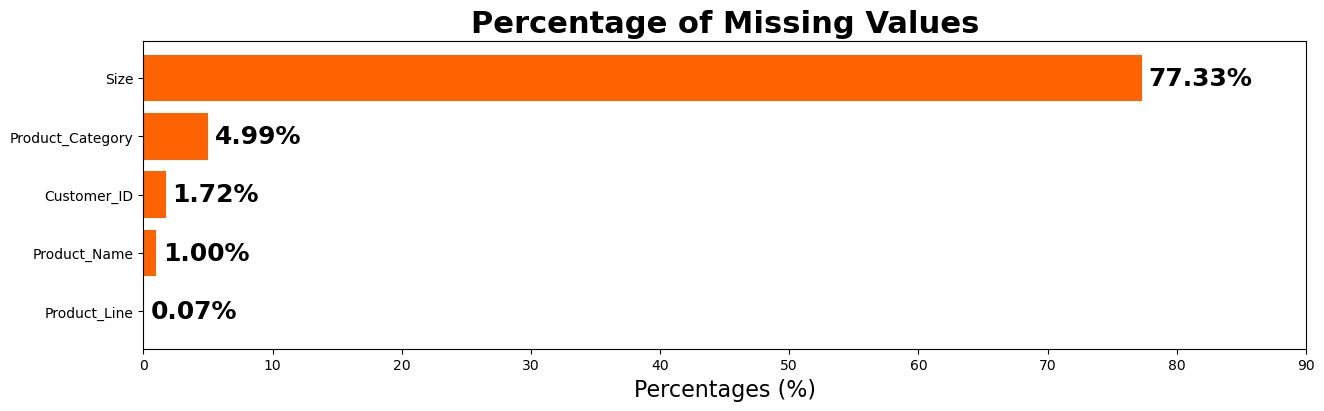

In [1052]:
#Calculating the percentahe of missing values for each column
missing_percentage = (missing_values[missing_values > 0]/df.shape[0])* 100

#Prepare values 
missing_percentage.sort_values(ascending=True, inplace=True)

# Plot the barh chart
fig, ax = plt.subplots(figsize=(15, 4))
ax.barh(missing_percentage.index, missing_percentage, color='#ff6200')

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(missing_percentage, missing_percentage.index)):
    ax.text(value+0.5, i, f"{value:.2f}%", ha='left', va='center', fontweight='bold', fontsize=18, color='black')

# Set x-axis limit
ax.set_xlim([0, 90])

# Add title and xlabel
plt.title("Percentage of Missing Values", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)
plt.show()

##### Handling Missing Values Strategy:

1.	Customer_ID (1.72% missing value): 
- The Customer ID column has a minor percentage of missing values. This column is crucial for customer analysis and if in future we want to create a recommendation system,
        
- Upon inspecting the rows with missing Customer_ID, it’s evident that these transactions are missing a key identifier for customer analysis. Since these transactions are only a small portion of the dataset, I will proceed by removing these rows to maintain the integrity of our customer analysis.

2.	Product_Name (1.00% missing value): 
- We can also the Product Name columns has a minor percentage of missing values 0.72% lesser than the Customer ID.This column is important for product analysis. 
        
- The rows with missing Product_Name also tend to have missing Product_Category values. Given that product name is critical for product analysis, I’ll remove these rows as well to ensure the quality of our dataset.

3.	Size(77.33%): 
- The Size column has significant percentage of missing values. This column is not part of key column in our analysis. 
        
- Since it has significant number of missing values the strategy here is to drop this column 

4.	Product_Category(4.99%): 
- This Product Category Column has reasonable percentage of missing values but not has significant has Size which is the highest. This column is also important for category-based and producrt analysis, so we’ll need to address these missing values.

- The rows with missing Product_Category can often be inferred based on the Product_Name or SKU. However, for simplicity and to ensure data quality, i will remove these rows as well.

5.	Product_Line(0.07%):
- This Product Line column has the least percentage of missing values. This column is also a key varaible in our analysis. 

- Finally, the missing values in the Product_Line column, which only has 2 missing values in same rows that have missing values in either Product category or product name. So they will be removed


By removing rows with missing values in the Customer ID, Product Name, and Product Category and removing the size column, we aim to construct a cleaner and more reliable dataset, which is essential for achieving accurate product and customer analysis.

In [1053]:
#Display Rows with missing values in product line 
df[df['Product_Line'].isnull()]

,Date,Order_Number,Customer_ID,Product_Name,SKU,Price,Size,Quantity,Product_Category,Product_Line
643,3/31/2019,5ZR-4930-9569-1000,e2b695c8-bf79-46d5-9455-f53f68562af2,NaN,RKAPY3I1TP,39.55,NaN,2,NaN,NaN
2808,3/8/2020,TAI-6046-9953-7908,NaN,NaN,O5FYJLBE0H,24.53,NaN,2,NaN,NaN


Remove Rows with Missng Values 

In [1054]:
# Removing rows with missing values in 'CustomerID' and 'Description' columns
df = df.dropna(subset= ['Product_Name', 'Product_Category', 'Customer_ID'])

#Remove size from dataframe because 77.33% of the data is null
df = df.drop(['Size'], axis=1)

#Verify the cleaning process
df.isnull().sum().sum()

# Extracting rows with missing values in 'Product_Category' or 'Product_Name' columns
df[df['Product_Category'].isnull() | df['Product_Name'].isnull()].head()

,Date,Order_Number,Customer_ID,Product_Name,SKU,Price,Quantity,Product_Category,Product_Line


#### 2.2 & 3 | Removing Duplicates & Convert Data Type

Next in line, I am going to recognize duplicate rows in the dataset and also ensure that the Date column is in the correct datetime format

In [1055]:
#Find Duolicate Rows(Mark all as True)
duplicates_row = df[df.duplicated(keep=False)]

print(f'The dataset contains {df.duplicated().sum()} duplicate rows that need to be removed')

#Removing duplicate rows if any exist
df.drop_duplicates(inplace=True)

The dataset contains 0 duplicate rows that need to be removed


##### Convert Data Type

In [1056]:
#Convert Data to datetime format
df['Date'] = pd.to_datetime(df['Date'])

#Check data types 
df.dtypes

Date                datetime64[ns]
Order_Number                object
Customer_ID                 object
Product_Name                object
SKU                         object
Price                      float64
Quantity                     int64
Product_Category            object
Product_Line                object
dtype: object

##### Short the Cusotomer_ID to less characters 

In [1057]:
#Short the Cusotomer_ID to 8 characters 
df['Customer_ID'] = df['Customer_ID'].str.slice(0,8)

Fortunately, this dataset contains no duplicate rows, so no rows need to be removed. Additionally, the date has been converted to DateTime format, and the customer ID has been shortened to a few characters.

#### 2.4 | Handling Outliers and Data Transformation

Outliers can significantly impact our analysis. So in this phase which is the last part of my scrub stage. I will:

- Identify and handle outliers in numerical columns like Price and Quantity.
- Transform data if needed to create new features or enhance the existing ones.


Text(0.5, 1.0, 'Boxplot of Price')

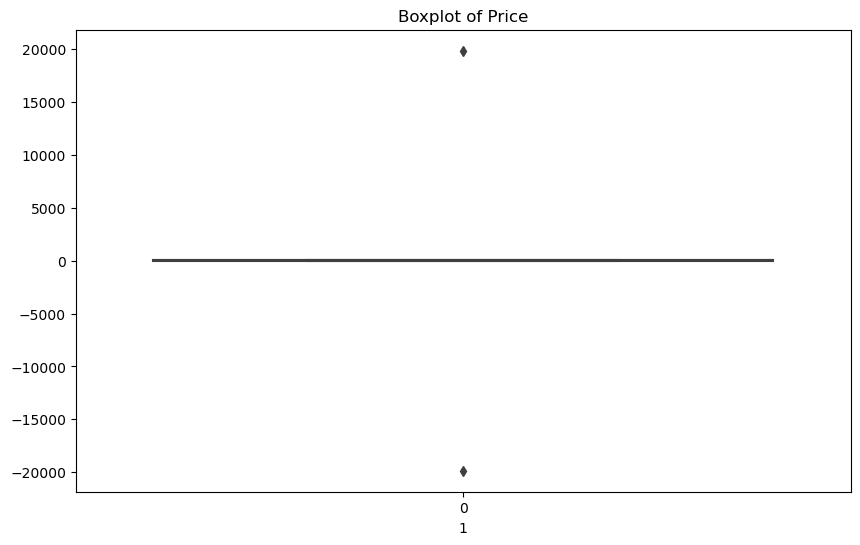

In [1058]:
#Boxplot of price
plt.figure(figsize=(10, 6))
ax = sns.boxplot(df['Price'])
ax.set_xlabel('1')
plt.title('Boxplot of Price')

Text(0.5, 1.0, 'Boxplot of Quantity')

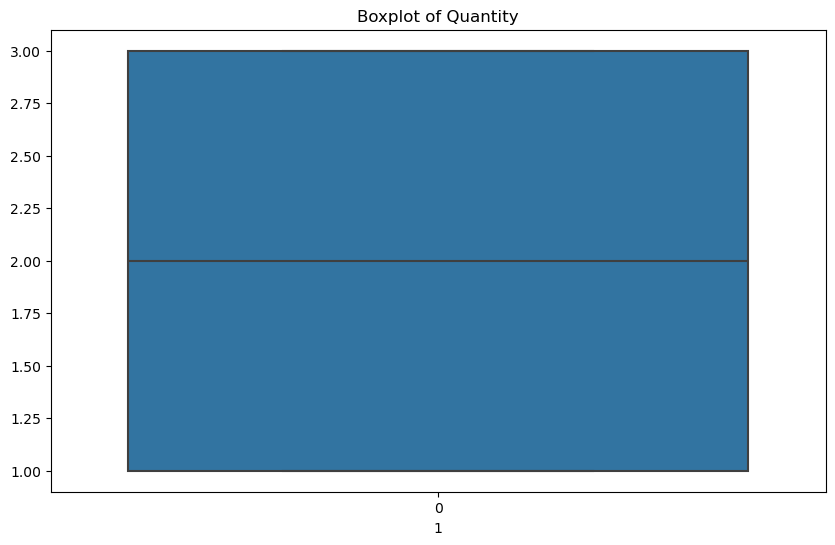

In [1059]:
#Boxplot of Quantity
plt.figure(figsize=(10, 6))
ax = sns.boxplot(df['Quantity'])
ax.set_xlabel('1')
plt.title('Boxplot of Quantity')

The boxplots reveal the presence of outliers in both the Price and Quantity columns. Outliers can distort the results of our analysis, i will be using the calculating IQR method, and I will remove outliers for both price and quantity.

In [1060]:
# Function to calculate IQR and remove outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df

# Removing outliers for both Price and Quantity
df = remove_outliers(df, 'Price')
df = remove_outliers(df, 'Quantity')

df

,Date,Order_Number,Customer_ID,Product_Name,SKU,Price,Quantity,Product_Category,Product_Line
0,2021-05-22,SXF-7309-1727-1334,476582ea,Feline Fix Mix,RKAPY3I1TP,39.55,1,treat,cat
1,2021-05-22,SXF-7309-1727-1334,476582ea,Scratchy Post,MPH6SCD7UT,26.95,3,toy,cat
2,2021-05-22,SXF-7309-1727-1334,476582ea,Reddy Beddy,DJWE1V9LZK,23.07,3,bedding,dog
3,2020-03-23,DG7-5410-5845-1340,5929a0e9,Snoozer Essentails,GABWVMEL2R,28.04,3,bedding,dog
4,2020-03-23,DG7-5410-5845-1340,5929a0e9,Reddy Beddy,KDTMPSBZKZ,13.84,1,bedding,dog
...,...,...,...,...,...,...,...,...,...
2898,2020-10-16,P8K-8079-0264-6569,468f40b3,Cat Cave,058G0P7V60,29.66,1,bedding,cat
2899,2020-10-16,P8K-8079-0264-6569,468f40b3,Kitty Climber,W86BRJ9SSG,39.32,1,toy,cat
2900,2020-10-16,P8K-8079-0264-6569,468f40b3,Fetch Blaster,M291KHJ4LW,29.47,1,toy,dog
2901,2020-10-16,P8K-8079-0264-6569,468f40b3,Snoozer Essentails,GABWVMEL2R,28.04,1,bedding,dog


I have effectively eliminated outliers in both the price and quantity fields utilizing the IQR method. Upon analysis, no remaining outliers were identified in these respective columns. To validate the efficacy of the outlier removal, we can proceed to visualize the Price column once more.

Text(0.5, 1.0, 'Boxplot of Price After Outliers')

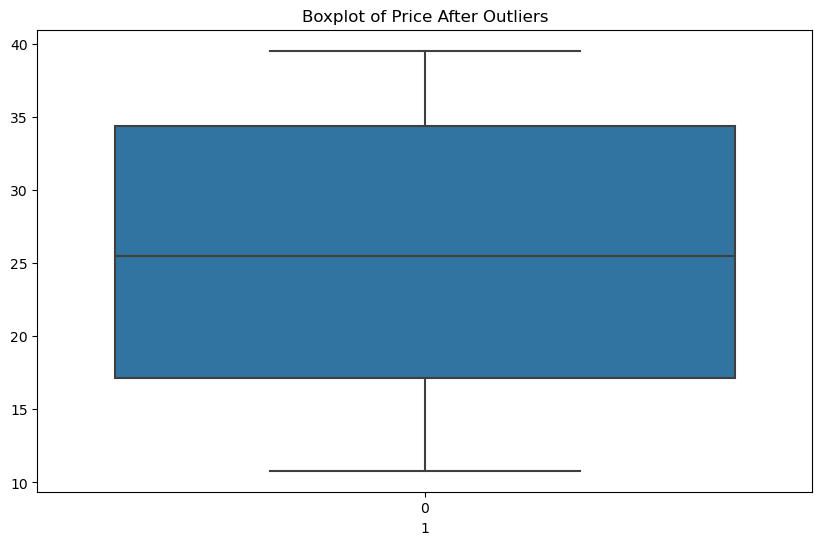

In [1061]:
#Boxplot of price
plt.figure(figsize=(10, 6))
ax = sns.boxplot(df['Price'])
ax.set_xlabel('1')
plt.title('Boxplot of Price After Outliers')

#### 2.5 | Feature Engineering 

After this, we need to review any essential data transformations or feature engineering procedures. Considering our objectives, it may be beneficial to generate new features to support our analysis. For instance:

1. Total Sales: We can create a new feature called Total_Sales by multiplying the Price and the Quantity.
2. Month and Year: We can extract the month and year from the Date column to enable time-based analysis.


In [1062]:
# Calculate the total revenue (total revenue)
df['Total_Sales'] = df['Price'] * df['Quantity']

# Convert Date to datetime and extract only the date
df['Day'] = df['Date'].dt.day

#Extract month and year for date column
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

#Display dataset
df


,Date,Order_Number,Customer_ID,Product_Name,SKU,Price,Quantity,Product_Category,Product_Line,Total_Sales,Day,Month,Year
0,2021-05-22,SXF-7309-1727-1334,476582ea,Feline Fix Mix,RKAPY3I1TP,39.55,1,treat,cat,39.55,22,5,2021
1,2021-05-22,SXF-7309-1727-1334,476582ea,Scratchy Post,MPH6SCD7UT,26.95,3,toy,cat,80.85,22,5,2021
2,2021-05-22,SXF-7309-1727-1334,476582ea,Reddy Beddy,DJWE1V9LZK,23.07,3,bedding,dog,69.21,22,5,2021
3,2020-03-23,DG7-5410-5845-1340,5929a0e9,Snoozer Essentails,GABWVMEL2R,28.04,3,bedding,dog,84.12,23,3,2020
4,2020-03-23,DG7-5410-5845-1340,5929a0e9,Reddy Beddy,KDTMPSBZKZ,13.84,1,bedding,dog,13.84,23,3,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2898,2020-10-16,P8K-8079-0264-6569,468f40b3,Cat Cave,058G0P7V60,29.66,1,bedding,cat,29.66,16,10,2020
2899,2020-10-16,P8K-8079-0264-6569,468f40b3,Kitty Climber,W86BRJ9SSG,39.32,1,toy,cat,39.32,16,10,2020
2900,2020-10-16,P8K-8079-0264-6569,468f40b3,Fetch Blaster,M291KHJ4LW,29.47,1,toy,dog,29.47,16,10,2020
2901,2020-10-16,P8K-8079-0264-6569,468f40b3,Snoozer Essentails,GABWVMEL2R,28.04,1,bedding,dog,28.04,16,10,2020


#### Summary of the Scrub Stage 

Data Cleaned:

1.	Handled Missing Values: Removed rows with missing Customer_ID, Product_Name, and   Product_Category. Removing Size column
2.	Data Type Cdonversions: Converted the Date column to datetime format.
3.	Removed Duplicates: No duplicates were found in the dataset.
4.	Handled Outliers: Removed outliers in the Price and Quantity columns using the IQR method.

Created New Features:

- Total_Sales: Calculated as Price * Quantity.
- Extracted Day, Month, and Year from the Date column.

### Step 3 | Explore

1. Descriptive Statistics: Summarize the key statistics of the dataset.
2. Custome and Product Analysis with feautre engineering

3. Data Visualization:
- Distribution of Sales by Date
- Top-Selling Products
- Sales Distribution by Product Line

4. Correlation Analysis: Analyze correlations between different features.

#### 3.1 | Descriptive Statistics Summary

In [1063]:
# Generate descriptive statistics for numerical columns
descriptive_stats = df.describe()

#Drop Date Column from the dataframe 
descriptive_stats = descriptive_stats.drop(['Date'], axis=1)

#Display descriptive stats
descriptive_stats

,Price,Quantity,Total_Sales,Day,Month,Year
count,2714.000000,2714.000000,2714.000000,2714.000000,2714.000000,2714.000000
mean,25.628412,1.988946,50.821455,15.831614,6.380987,2019.942889
min,10.800000,1.000000,10.800000,1.000000,1.000000,2019.000000
25%,17.160000,1.000000,29.060000,8.000000,4.000000,2019.000000
50%,25.480000,2.000000,43.590000,16.000000,6.000000,2020.000000
75%,34.380000,3.000000,72.600000,23.000000,9.000000,2021.000000
max,39.550000,3.000000,118.650000,31.000000,12.000000,2021.000000
std,8.808852,0.818976,27.957103,8.638628,3.206843,0.748053


Price:
-	The average price of items sold is $25.63, with prices ranging from $10.80 to $39.55. The price distribution is fairly spread out, as indicated by the standard deviation of $8.81.

Quantity:
-	Transactions mostly involve 1 to 3 items, with an average quantity of approximately 2 items per sale. This is reflected in the median quantity of 2 and a standard deviation of 0.82, showing a slight variation in quantities purchased.

Total Sales:
-	The total sales values vary significantly, ranging from $10.80 to $118.65, with an average of $50.82. The standard deviation of $27.96 indicates considerable variability in total sales amounts.

Day of the Month:
-	Sales are fairly evenly distributed throughout the month, with a slight peak around the 16th day. The average day of sale is the 15th, and the data shows a broad distribution, with sales occurring on all days from the 1st to the 31st.

Month of the Year:
-	Sales are distributed across all months, with a slight concentration in the middle months of the year. The average month of sale is June, with sales occurring from January to December.

Year:
-	The data spans from 2019 to 2021, with the majority of sales occurring in 2020. This is reflected in the median year being 2020, showing a steady flow of sales over the three-year period.

#### 3.2 | Customer And Product Analysis

##### 3.2.1 | Customer Analysis

In [1064]:
#Calculate the total spend by each customer 
total_spend_by_customer = df.groupby('Customer_ID')['Total_Sales'].sum().reset_index()
total_spend_by_customer.rename(columns={'Total_Sales': 'Total_Spend'}, inplace=True)

#Find the most recent purchase date for each customers  
customer_data = df.groupby('Customer_ID')['Day'].max().reset_index()

# Find the most recent date in the entire dataset
most_recent_date = df['Day'].max()

# Convert Day to datetime type before subtraction
customer_data['Day'] = pd.to_datetime(customer_data['Day'])
most_recent_date = pd.to_datetime(most_recent_date)

# Calculate the number of days since the last purchase for each customer
customer_data['Days_Since_Last_Purchase'] = (most_recent_date - customer_data['Day']).dt.days

#Calculate the avg price per customer
price= df.groupby('Customer_ID')['Price'].mean().reset_index()

# Calculate the total number of transactions made by each customer
total_order_by_customer= df.groupby('Customer_ID')['Order_Number'].nunique().reset_index()
total_order_by_customer.rename(columns={'Order_Number': 'Total_Transactions'}, inplace=True)

# Calculate the total number of products purchased by each customer
total_products_purchased = df.groupby('Customer_ID')['Quantity'].sum().reset_index()
total_products_purchased.rename(columns={'Quantity': 'Total_Products_Purchased'}, inplace=True)

# Customer spending vs. number of product lines purchased
customer_product_lines = df.groupby('Customer_ID')['Product_Line'].nunique().reset_index()
customer_product_lines.columns = ['Customer_ID', 'Number_of_Product_Lines']

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, total_spend_by_customer, on='Customer_ID')
customer_data = pd.merge(customer_data, total_order_by_customer, on='Customer_ID')
customer_data = pd.merge(customer_data, total_products_purchased, on='Customer_ID')
customer_data = pd.merge(customer_data, customer_product_lines , on='Customer_ID')
customer_data = pd.merge(customer_data, price, on='Customer_ID')


# Remove the Day column
customer_data.drop(columns=['Day'], inplace=True)

# Display the first few rows of the customer_data dataframe
customer_data.sort_values(by='Total_Spend', ascending=False)

,Customer_ID,Days_Since_Last_Purchase,Total_Spend,Total_Transactions,Total_Products_Purchased,Number_of_Product_Lines,Price
542,dfb40ee9,0,1149.19,4,40,2,27.861765
378,9661b347,0,989.67,6,37,2,26.093333
452,b20bec48,0,860.18,5,36,2,24.017059
589,ee6d3390,0,814.85,4,34,2,23.438235
318,7d3dd886,0,806.31,3,28,2,27.344615
...,...,...,...,...,...,...,...
76,20bc9b39,0,13.84,1,1,1,13.840000
105,2de28313,0,13.84,1,1,1,13.840000
249,6229c51d,0,10.80,1,1,1,10.800000
184,4d9d5f2c,0,10.80,1,1,1,10.800000


We can Customer with index of 542 and ID"dfb40ee9" leads in total spend with $1,149.19 across 4 transactions, purchasing 40 products across 2 product lines with an average price of $27.86. Customer with index 378 follows with a total spend of $989.67 from 6 transactions, buying 37 products across 2 product lines with an average price of $26.09.

####  3.2.2 | Product Analysis

##### Product Line

In [1065]:
#Find the most recent purchase date for product line
product_lines_data = df.groupby('Product_Line')['Day'].max().reset_index()

# Convert Day to datetime type before subtraction
product_lines_data['Day'] = pd.to_datetime(product_lines_data['Day'])

# Calculate the number of days since the last purchase for each customer
product_lines_data['Days_Since_Last_Purchase'] = (most_recent_date - product_lines_data['Day']).dt.days

# Group by Product_Line, Product_Category, and Product_Name to find top-selling products
total_sr_by_product_line= df.groupby('Product_Line')['Total_Sales'].sum().reset_index().sort_values(by='Total_Sales', ascending=False)

#Calculating the total number of orders by Product Line
total_order_by_product_lines = df.groupby('Product_Line')['Order_Number'].nunique().reset_index()
total_order_by_product_lines.rename(columns={'Order_Number': 'Total_Orders'}, inplace=True)

#Calculating the total number of quantity purchased by product line
total_quantities_purchased = df.groupby('Product_Line')['Quantity'].sum().reset_index()
total_quantities_purchased.rename(columns={'Quantity': 'Total_Quantities_Purchased'}, inplace=True)

#Merge the new features into the production lines dataframe 
product_lines_data = pd.merge(product_lines_data, total_sr_by_product_line, on = 'Product_Line')
product_lines_data = pd.merge(product_lines_data, total_order_by_product_lines, on = 'Product_Line')
product_lines_data = pd.merge(product_lines_data, total_quantities_purchased, on = 'Product_Line')

#Calcu;ating Average total order value for each pproduct line
average_order_value = product_lines_data['Total_Sales']/product_lines_data['Total_Orders']
product_lines_data['average_order_value'] = average_order_value 

# Remove the Day column
product_lines_data.drop(columns=['Day'], inplace=True)


product_lines_data

,Product_Line,Days_Since_Last_Purchase,Total_Sales,Total_Orders,Total_Quantities_Purchased,average_order_value
0,cat,0,70841.94,801,2825,88.441873
1,dog,0,67087.49,768,2573,87.353503


Cat products outperform dog products across various metrics. They generate slightly higher total revenue ($70,841.94) compared to dog products ($67,087.49). The number of orders for cat products (801) is also higher than for dog products (768). Additionally, the total quantities purchased for cat products (2825) surpass those of dog products (2573). The average order value for cat products is $88.44, slightly higher than the $87.35 for dog products, indicating that cat product orders tend to have a higher value per order.

##### Product Category 

In [1066]:
#Find the most recent purchase date for each Product_Category  
product_categories_data = df.groupby('Product_Category')['Day'].max().reset_index()

# Convert Day to datetime type before subtraction
product_categories_data['Day'] = pd.to_datetime(product_categories_data['Day'])

# Calculate the number of days since the last purchase for each customer
product_categories_data['Days_Since_Last_Purchase'] = (most_recent_date - product_categories_data['Day']).dt.days

#Calculating product category by Total Spent 
total_sr_product_categories= df.groupby('Product_Category')['Total_Sales'].sum().reset_index().sort_values(by='Total_Sales', ascending=False)

#Calculating the total numbers of orders by product category
total_order_by_product_category=df.groupby('Product_Category')['Order_Number'].nunique().reset_index()
total_order_by_product_category.rename(columns={'Order_Number': 'Total_Orders'}, inplace=True)

#Calculating Total Quantity Purchased By Product Category
total_quantity_purchased_by_product_category = df.groupby('Product_Category')['Quantity'].sum().sort_values().reset_index()
total_quantity_purchased_by_product_category.rename(columns={'Quantity': 'Total_Quantity_Purchased'}, inplace=True)


#Merge two new features for Product Category in product_categories_data 
product_categories_data = pd.merge(product_categories_data, total_sr_product_categories, on='Product_Category')
product_categories_data = pd.merge(product_categories_data, total_order_by_product_category, on='Product_Category')
product_categories_data = pd.merge(product_categories_data, total_quantity_purchased_by_product_category, on='Product_Category')

#Calcu;ating Average total order value for each pproduct category
average_order_value = product_categories_data['Total_Sales']/product_categories_data['Total_Orders']
product_categories_data['average_order_value'] = average_order_value 

# Remove the Day column
product_categories_data.drop(columns=['Day'], inplace=True)

product_categories_data


,Product_Category,Days_Since_Last_Purchase,Total_Sales,Total_Orders,Total_Quantity_Purchased,average_order_value
0,bedding,0,40987.00,550,1479,74.521818
1,food,0,20660.76,403,927,51.267395
2,toy,0,39256.90,565,1513,69.481239
3,treat,0,37024.77,556,1479,66.591313


Bedding products lead in total sales, generating $40,987.00 from 550 orders, with a total quantity purchased of 1479 and an average order value of $74.52. Toy products follow closely, with total sales of $39,256.90 from 565 orders and a total quantity purchased of 1513, resulting in an average order value of $69.48. Treat products have total sales of $37,024.77 from 556 orders, matching bedding in total quantity purchased (1479) and an average order value of $66.59. Food products lag behind, with total sales of $20,660.76 from 403 orders and a total quantity purchased of 927, leading to a lower average order value of $51.27.

##### Product Name

In [1067]:
#Find the most recent purchase date for each product name
product_name_data = df.groupby('Product_Name')['Day'].max().reset_index()

# Convert Day to datetime type before subtraction
product_name_data['Day'] = pd.to_datetime(product_name_data['Day'])

# Calculate the number of days since the last purchase for each customer
product_name_data['Days_Since_Last_Purchase'] = (most_recent_date - product_name_data['Day']).dt.days

#Calculating total revenue by Product_Name
total_sr_product_name = df.groupby('Product_Name')['Total_Sales'].sum().reset_index().sort_values(by='Total_Sales', ascending=False)

#Calculating the total numbers of orders by product category
total_order_product_name=df.groupby('Product_Name')['Order_Number'].nunique().reset_index()
total_order_product_name.rename(columns={'Order_Number': 'Total_Orders'}, inplace=True)

#Calculating Total Quantity Purchased By Product Category
total_quantity_purchased_by_product_name = df.groupby('Product_Name')['Quantity'].sum().sort_values().reset_index()
total_quantity_purchased_by_product_name.rename(columns={'Quantity': 'Total_Quantity_Purchased'}, inplace=True)

# Calculate average price for each product
average_prices_by_product_name = df.groupby('Product_Name')['Price'].mean().reset_index().sort_values(by='Price', ascending=False)


#Merge two new features for Product Category in product_categories_data 
product_name_data = pd.merge(product_name_data, total_sr_product_name, on='Product_Name')
product_name_data  = pd.merge(product_name_data, total_order_product_name, on='Product_Name')
product_name_data= pd.merge(product_name_data, total_quantity_purchased_by_product_name , on='Product_Name')
product_name_data = pd.merge(product_name_data, average_prices_by_product_name, on='Product_Name')

#Calcu;ating Average total order value for each pproduct category
average_order_value =product_name_data ['Total_Sales']/product_name_data['Total_Orders']
product_name_data['average_order_value'] = average_order_value 

# Remove the Day column
product_name_data.drop(columns=['Day'], inplace=True)

#Find top 10 product name 
top_10_product_name_by_total_orders =  product_name_data.sort_values('Total_Sales', ascending=False).head(10)


top_10_product_name_by_total_orders 

,Product_Name,Days_Since_Last_Purchase,Total_Sales,Total_Orders,Total_Quantity_Purchased,Price,average_order_value
12,Reddy Beddy,0,18028.16,322,731,24.50675,55.988075
5,Feline Fix Mix,0,9492.00,124,240,39.55000,76.548387
2,Cat Cave,0,8482.76,142,286,29.66000,59.737746
16,Snoozer Hammock,0,8251.20,121,240,34.38000,68.191736
3,Chewie Dental,0,8015.70,110,210,38.17000,72.870000
8,Kitty Climber,0,7942.64,105,202,39.32000,75.644190
6,Fetch Blaster,0,7396.97,121,251,29.47000,61.131983
4,Chomp-a Plush,0,7298.64,98,186,39.24000,74.475918
20,Yum Fish-Dish,0,6462.93,104,211,30.63000,62.143558
11,Purrfect Puree,0,6287.40,159,315,19.96000,39.543396


Reddy Beddy leads in total sales with $18,028.16 from 322 orders, totaling 731 units purchased at an average order value of $55.99. Feline Fix Mix follows with $9,492.00 in sales from 124 orders and 240 units, priced at $39.55 with an average order value of $76.55. Cat Cave has $8,482.76 in sales from 142 orders, 286 units purchased, and a price of $29.66, resulting in an average order value of $59.74. The Snoozer Hammock has sales of $8,251.20 from 121 orders and 240 units, priced at $34.38 with an average order value of $68.19. Chewie Dental follows closely with $8,015.70 in sales from 110 orders and 210 units purchased at $38.17, with an average order value of $72.87. Kitty Climber has $7,942.64 in sales from 105 orders and 202 units, priced at $39.32, resulting in an average order value of $75.64. Fetch Blaster achieves $7,396.97 in sales from 121 orders and 251 units at $29.47, with an average order value of $61.13. Chomp-a Plush has sales of $7,298.64 from 98 orders and 186 units, priced at $39.24, with an average order value of $74.48. Yum Fish-Dish totals $6,462.93 in sales from 104 orders and 211 units at $30.63, with an average order value of $62.14. Lastly, Purrfect Puree records $6,287.40 in sales from 159 orders and 315 units at $19.96, resulting in the lowest average order value of $39.54.

### 3.3 | Data Visualization

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


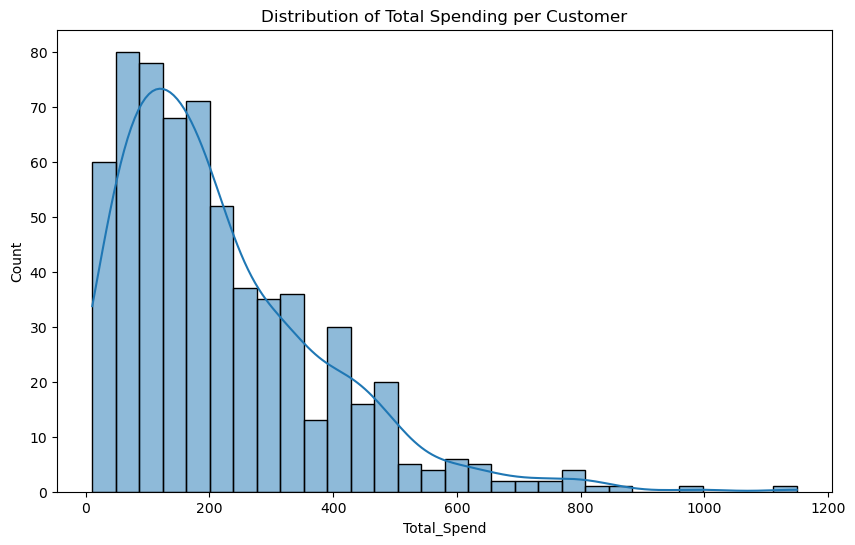

In [1068]:
# Distribution of total spending per customer
plt.figure(figsize=(10, 6))
ax =sns.histplot(total_spend_by_customer ['Total_Spend'], bins=30, kde=True)
plt.title('Distribution of Total Spending per Customer')
plt.show()

From the distribution of total spending per customer, we can easily cluster our customers into low spenders, high spenders, and very high spenders. But we are going to do this in the model stage and also create a recommendation system so that with we can have more scientifcal backup, so we wont just be assuming. SO this plot,  Most customers spend below $400, with a peak spending range between $100 and $200. A smaller number of high spenders create a right-skewed distribution, with very few spending over $800.

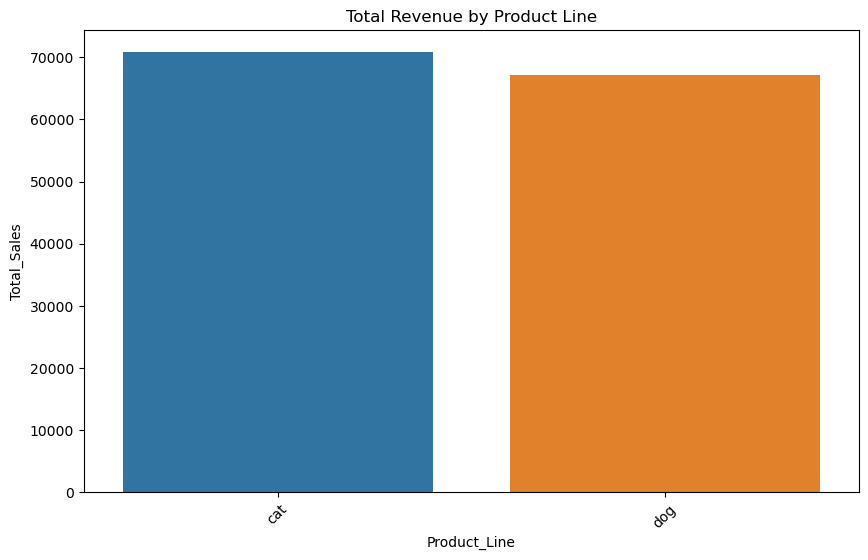

In [1069]:
# Sales contribution by Product Line
plt.figure(figsize=(10, 6))
ax = sns.barplot(product_lines_data, x='Product_Line', y='Total_Sales')
plt.title('Total Revenue by Product Line')
plt.xticks(rotation=45)
plt.show()

Cat products generate slightly higher total revenue compared to dog products, with a noticeable but not substantial difference. Both product lines perform well, each generating over $65,000 in total sales. Cat products lead with total sales slightly above $70,000, while dog products follow closely with total sales just below $70,000.

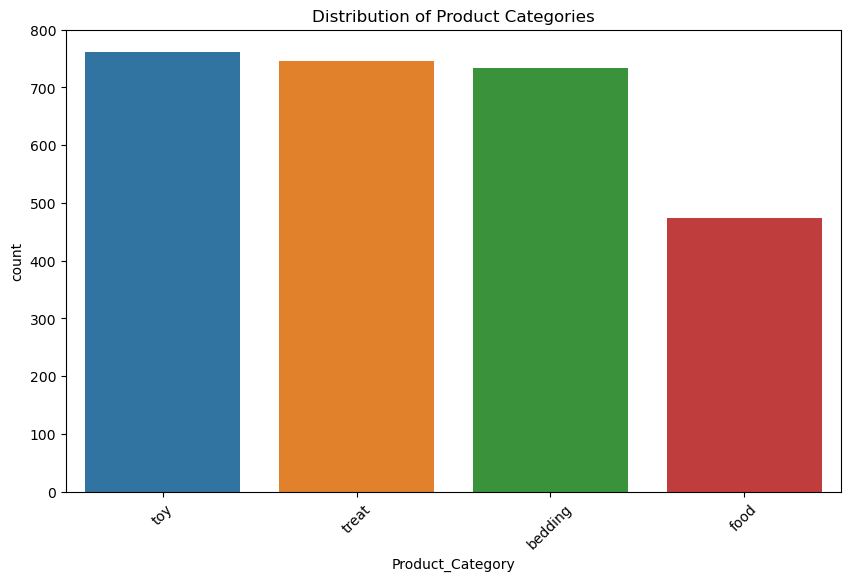

In [1070]:
# Distribution of product categories
plt.figure(figsize=(10, 6))
sns.countplot(df, x='Product_Category', order=df['Product_Category'].value_counts().index )
plt.title('Distribution of Product Categories')
plt.xticks(rotation=45)
plt.show()

The distribution of product categories indicates that toys and treats are the most popular, with approximately 750 transactions each. Bedding closely follows with nearly 700 transactions. Food is the least popular category, with approximately 500 transactions. It's important to note that while toys and treats are the most popular, they may not contribute the most to total sales. This will be reflected in the total sales plot by product categories.

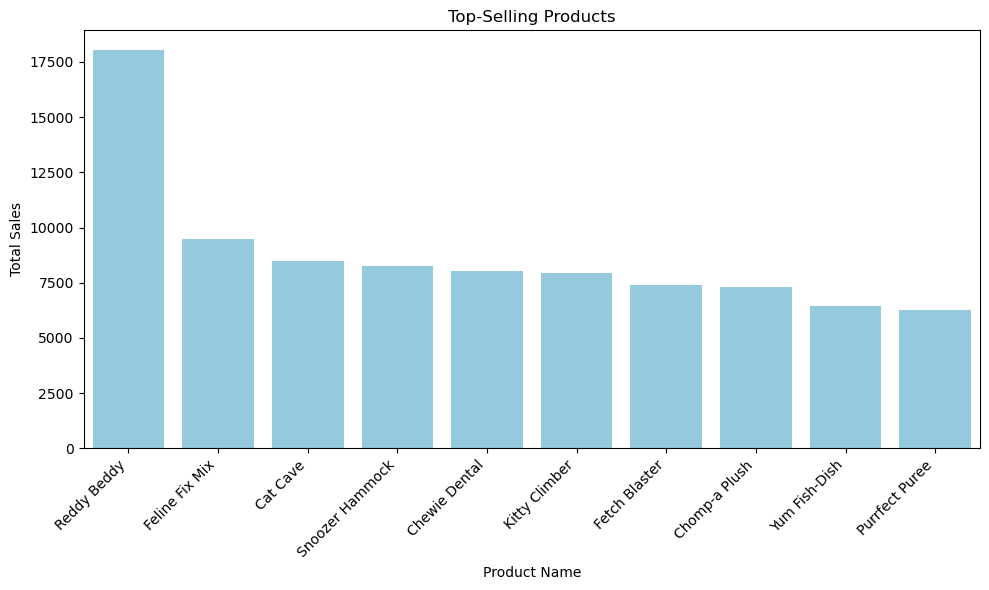

In [1071]:
# Group data by Product_Name and sum Total_Sales
top_selling_products = total_sr_product_name.head(10).reset_index()

# Plotting the top-selling products
plt.figure(figsize=(10, 6))
ax = sns.barplot(top_selling_products, x = 'Product_Name', y='Total_Sales', color='skyblue')
plt.title('Top-Selling Products')
ax.set_xlabel('Product Name')
ax.set_ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Reddy Beddy is the clear leader in total sales, significantly outperforming other products with sales nearing $18,000. Feline Fix Mix follows as the second highest-selling product with sales around $10,000. Other products, such as Cat Cave, Snoozer Hammock, Chewie Dental, Kitty Climber, Fetch Blaster, Chomp-a Plush, Yum Fish-Dish, and Purrfect Puree, have more balanced sales figures, ranging between $6,000 and $8,000.

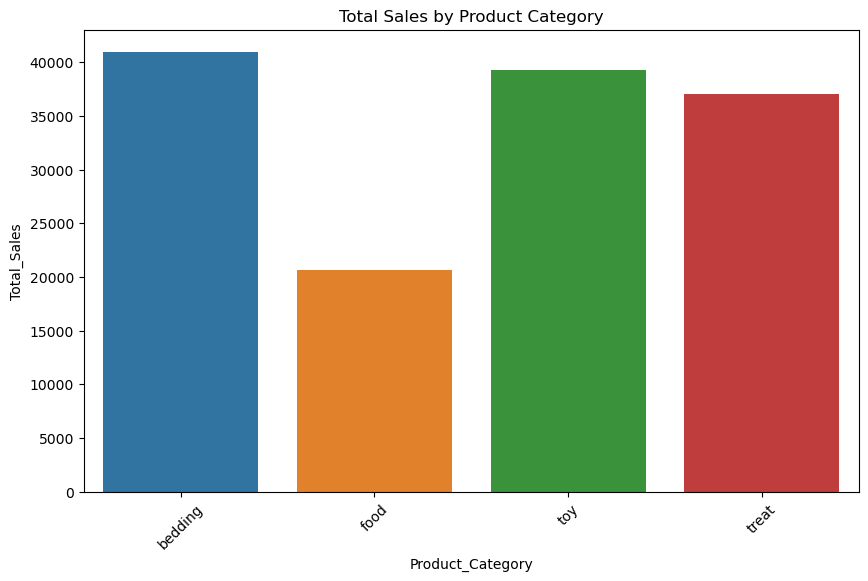

In [1072]:
# Sales contribution by Product Category
plt.figure(figsize=(10, 6))
sns.barplot(data=product_categories_data, x='Product_Category', y='Total_Sales')
plt.title('Total Sales by Product Category')
plt.xticks(rotation=45)
plt.show()

The total sales plot by product categories reveals that bedding products lead in total sales, followed closely by toys and treats, each generating around $37,000 to $39,000. Food products, despite being less popular in transactions, have the lowest total sales, amounting to just over $20,000.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


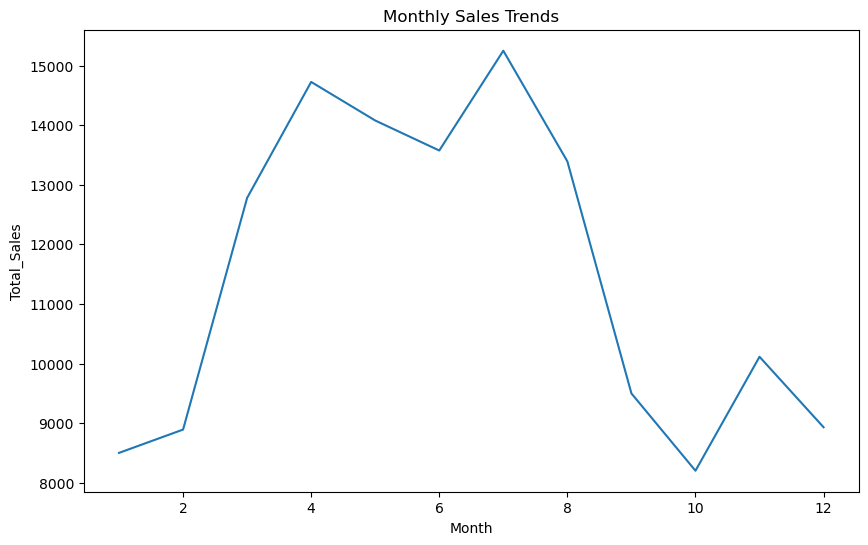

In [1073]:
#Calculate monthly sales
monthly_sales = df.groupby(['Month'])['Total_Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(monthly_sales, x='Month', y='Total_Sales')
plt.title('Monthly Sales Trends')
plt.xticks()
plt.show()


Sales show a significant rise starting from February, peaking around May to June with approximately 15,000 in total sales. Following this peak, there is a steady decline, with a noticeable drop in August. Sales hit a low point in October, followed by a slight recovery in November, before dipping again towards December.

#### 3.4 | Correlation Analysis 

Next, i will analyze correlations between different features to uncover any significant relationships.

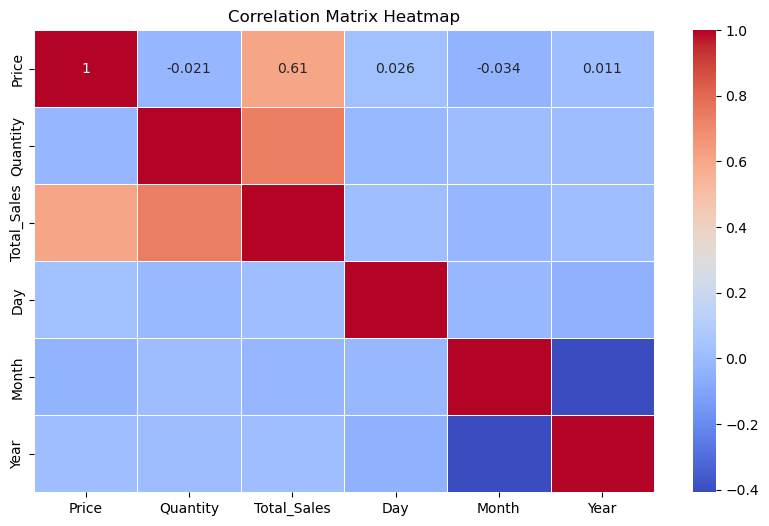

In [1082]:
#Select Only Numeric column 
numeric_columns = df.select_dtypes(include=['float64', 'int64', 'int32'])

#Calculate correlation metrix
correlation_metrix = numeric_columns.corr()

plt.figure(figsize=(10, 6))
plt.title('Correlation Matrix Heatmap')
ax = sns.heatmap(correlation_metrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.show()



The correlation matrix reveals a moderate positive correlation between price and quantity sold, indicating that higher prices are associated with higher quantities sold. Total sales are highly correlated with quantity, showing that increased quantities directly drive higher sales. Price changes have negligible correlations with time variables (day, month, year), suggesting that pricing is relatively independent of these factors. Additionally, sales are not significantly influenced by specific days, months, or years.

### Model

Models are mathematical tools that are used to identify hidden patterns in data, which may not be immediately obvious to humans. These patterns can then be applied to new data. In the field of marketing, models are used for various tasks such as predicting sales, identifying potential customers, and segmenting audiences into different groups. I will be using K-means clustering to segment the business's customers.

1.  The customer segmentation process 
2. . Recommendation System




#### Customer Segementation

Prepare Data for Clustering & Standardization

I’ll use features such as Total_Sales(Total_Spend), Quantity, Number_of_Product_Lines, and Price for clustering. Then Standardize the data to ensures that all features contribute equally to the clustering process.

In [1075]:
# Select relevant features for clustering
features_for_clustering = customer_data[['Customer_ID', 'Total_Spend', 'Total_Products_Purchased', 'Price', 'Number_of_Product_Lines']]

# Standardize the features
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data[['Total_Spend', 'Total_Products_Purchased', 'Price', 'Number_of_Product_Lines']])

# Convert the scaled data back to a DataFrame
customer_data_scaled_df = pd.DataFrame(customer_data_scaled, columns=['Total_Spend', 'Total_Products_Purchased', 'Price', 'Number_of_Product_Lines'])

# Display the standardized customer data
customer_data_scaled_df.head()


,Total_Spend,Total_Products_Purchased,Price,Number_of_Product_Lines
0,-0.299811,-0.250731,0.471089,0.654654
1,0.988986,1.188182,0.215410,0.654654
2,-1.108498,-1.050127,-1.645598,-1.527525
3,-0.691905,-0.890248,1.720906,-1.527525
4,-0.100776,-0.250731,0.077187,0.654654


Determine Optimal Number of Clusters. I will use the elbow method to determine the optimal number of clusters.

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

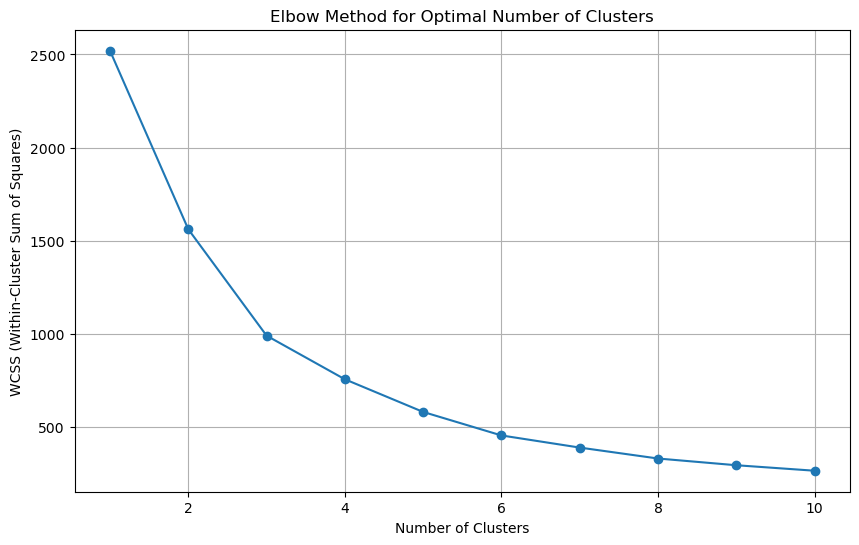

In [1076]:
# Use the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(customer_data_scaled_df)
    wcss.append(kmeans.inertia_)

# Plot the elbow method results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

The elbow plot suggests that the optimal number of clusters is around 3, as there is a noticeable “elbow” at this point where the Within-Cluster Sum of Squares (WCSS) starts to decrease more slowly.

Apply K-means Clustering

In [1077]:
# Applying K-means clustering with 3 clusters
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(customer_data_scaled_df)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Analyze Customer Segments

In [1078]:
# Exclude non-numeric columns (Customer_ID)
numeric_columns = ['Total_Spend', 'Total_Transactions', 'Total_Products_Purchased', 'Number_of_Product_Lines', 'Price']

# Group by Cluster and calculate the mean of numeric columns
customer_segments = customer_data.groupby('Cluster')[numeric_columns].mean()

# Display customer segments analysis
customer_segments


,Total_Spend,Total_Transactions,Total_Products_Purchased,Number_of_Product_Lines,Price
Cluster,,,,,
0,476.032426,2.617647,18.102941,1.992647,26.582638
1,183.750588,1.385621,7.415033,2.000000,25.002242
2,90.219894,1.085106,3.547872,1.000000,25.015498


High spenders (Cluster 0) show the highest engagement and diversity in purchases, suggesting opportunities for VIP programs and personalized offers. Moderate spenders (Cluster 1) can be encouraged to increase their purchasing frequency through targeted promotions and cross-selling. Low spenders (Cluster 2) exhibit the least engagement, indicating the need for strategies to boost their overall spending and product exploration.

We cann see that cluster 0 have the highest 

#### Recommendation System

In [1079]:
# Identify products purchased by each customer
customer_purchases = df.groupby('Customer_ID')['Product_Name'].apply(list).reset_index()

# Merge customer segments with their purchases
customer_segments_purchases = customer_data.merge(customer_purchases, on='Customer_ID', how='left')

# Function to recommend top-selling products not yet purchased by the customer
def recommend_products(purchased_products, top_products):
    return [product for product in top_products if product not in purchased_products]

# Apply the recommendation function to each customer
top_product_list = top_selling_products['Product_Name'].tolist()
customer_segments_purchases['Recommendations'] = customer_segments_purchases['Product_Name'].apply(lambda x: recommend_products(x, top_product_list))

# Display the recommendation for each segment
recommendation_per_segment = customer_segments_purchases[['Customer_ID', 'Cluster', 'Recommendations']]

recommendation_per_segment


,Customer_ID,Cluster,Recommendations
0,0056d84b,1,"[Feline Fix Mix, Cat Cave, Snoozer Hammock, Ch..."
1,00c30446,0,"[Feline Fix Mix, Kitty Climber, Fetch Blaster,..."
2,00f188cc,2,"[Reddy Beddy, Feline Fix Mix, Cat Cave, Snooze..."
3,0123f56d,2,"[Reddy Beddy, Feline Fix Mix, Cat Cave, Chewie..."
4,01377bb1,1,"[Snoozer Hammock, Chewie Dental, Kitty Climber..."
...,...,...,...
625,fd7a4edd,2,"[Reddy Beddy, Feline Fix Mix, Cat Cave, Snooze..."
626,fdf8e8d7,1,"[Cat Cave, Snoozer Hammock, Chewie Dental, Kit..."
627,fdfa89c3,1,"[Feline Fix Mix, Cat Cave, Snoozer Hammock, Ch..."
628,fe751f62,2,"[Reddy Beddy, Feline Fix Mix, Cat Cave, Chewie..."


1. High spenders (Cluster 0) exhibit the highest total spend and frequent transactions. Recommendations for this group include top-selling products like Feline Fix Mix, Kitty Climber, and Fetch Blaster, aiming to maintain their high engagement with exclusive offers and new items.

2. Moderate spenders (Cluster 1) show balanced purchasing behavior. They are recommended a mix of popular products such as Cat Cave and Snoozer Hammock to encourage more frequent purchases and explore complementary items across different categories.

3. Low spenders (Cluster 2) have the lowest engagement and spending. Recommendations for this group, including Reddy Beddy and Feline Fix Mix, focus on increasing interaction by introducing them to top-selling products and offering incentives for higher purchases.

##### Seasonal sales trends

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


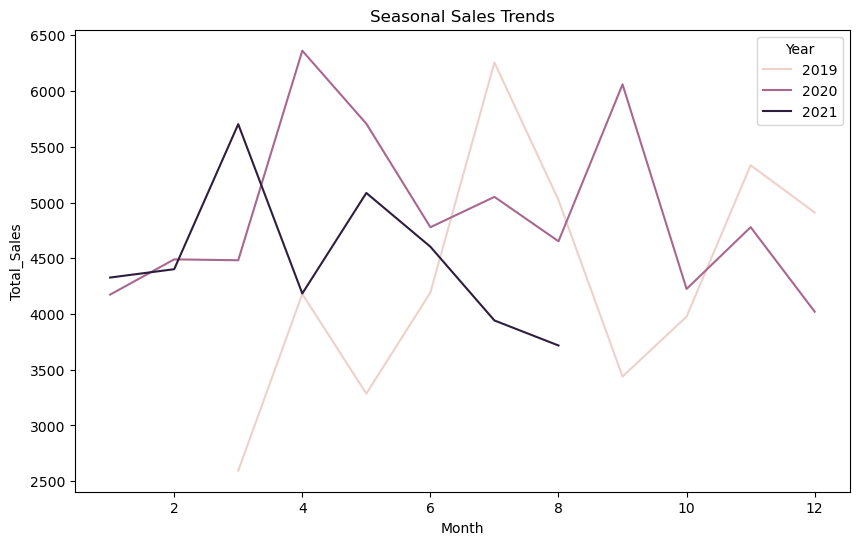

In [1083]:
# Extract month and year from Date
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Seasonal sales trends
seasonal_sales = df.groupby(['Year', 'Month'])['Total_Sales'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=seasonal_sales, x='Month', y='Total_Sales', hue='Year')
plt.title('Seasonal Sales Trends')
plt.show()

The sales consistently peak from May to July each year, indicating strong demand for products in each product line. However, sales drop significantly in September and October across all years, suggesting a seasonal dip during these months. In summary, sales peaked higher in 2020 compared to 2019, possibly due to increased pet ownership, special offers, or customers being willing to spend more on their pets. 2021 experienced a mid-year decline, possibly due to market conditions or changes in customer behavior.

##### Top Selling Product Category By Product Line

Text(0.5, 1.0, 'Total Quantity of Product Categories Sold by Product Line')

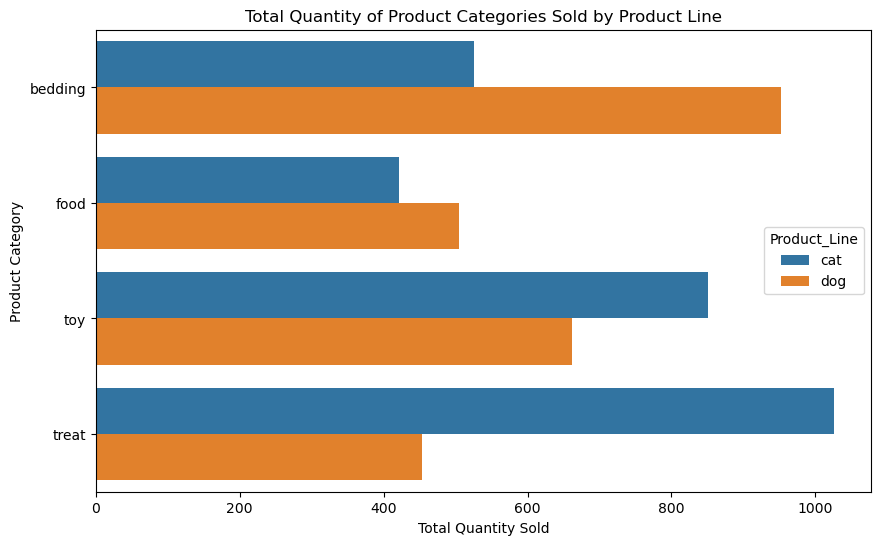

In [1084]:
#Calculating quantity sold by product category and product line
categories_sales = df.groupby(['Product_Line', 'Product_Category'])['Quantity'].sum().reset_index()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Quantity', y='Product_Category', hue='Product_Line', data= categories_sales , orient='h')
ax.set_xlabel('Total Quantity Sold')
ax.set_ylabel('Product Category')
plt.title('Total Quantity of Product Categories Sold by Product Line')

The most popular product categories for the product line "Cat" are treats, indicating that most of our cat owner customers purchase treats for their cats. The second most popular category is toys, followed by food. For the "Dog" product line, the most popular categories are bedding, toys, and food, in that order.

I recommend focusing on these popular categories to potentially increase sales.  However, it's important to consider that this data only shows the quantity of products sold, not the profit generated from each sale. Less popular categories could be more profitable due to higher prices or lower costs.

### Stage 5: Interpret

The interpret stage involves summarizing the findings from the analysis, providing actionable insights, and making recommendations based on the data. This stage is crucial for translating data insights into business strategies that can drive growth and improve customer satisfaction.

#### Summary of Findings

1.	Customer Segmentation:
	-	Cluster 0 (High Spenders): These customers have the highest total spend and purchase a wide variety of products. They are highly engaged and show a preference for higher-priced items.
	-	Cluster 1 (Moderate Spenders): Moderate spenders who purchase products across different lines but with less frequency and diversity than high spenders. They represent a balanced segment with potential for growth.
	-	Cluster 2 (Low Spenders): Customers with the lowest spend, making infrequent purchases from a limited range of products. They exhibit the least engagement and diversity in purchasing behavior.
2.	Product Analysis:
	-	Total Number of Product Categories: The analysis revealed the distribution of unique product categories sold within each product line (cat & dog). This helps understand the product mix and customer preferences.
3.	Recommendation System:
	-	The recommendation system successfully identified top-selling products that each customer segment has not yet purchased. This personalized approach increases the likelihood of additional purchases by suggesting relevant and popular products.

#### Actionable Insights

1.	Customer Retention and Loyalty Programs:
	-	For high spenders (Cluster 0), implement VIP or loyalty programs to reward their frequent purchases and high engagement. Exclusive offers and early access to new products can enhance their loyalty.
	-	For moderate spenders (Cluster 1), targeted promotional campaigns and cross-selling strategies can encourage higher spending. Loyalty incentives can further boost their engagement.
	-	For low spenders (Cluster 2), awareness campaigns and incentives for higher purchases can increase their engagement. Educational content about product benefits can help diversify their purchasing behavior.
2.	Personalized Marketing:
	-	Utilize the insights from customer segmentation to design personalized marketing campaigns. Tailoring messages and offers based on customer behavior and preferences will likely result in higher conversion rates and customer satisfaction.
3.	Product Mix and Inventory Management:
	-	Understanding the total number of product categories within each product line helps optimize inventory management. Ensuring the availability of top-selling products and diversifying the product mix based on customer preferences can improve sales and customer satisfaction.
4.	Recommendation Engine:
	-	Implement the recommendation engine to provide personalized product suggestions. This system can drive additional purchases by recommending top-selling products that customers have not yet bought, thus enhancing their shopping experience.

#### Recommendations

1.	Enhance Customer Experience:
	 -	Implement a robust customer loyalty program to reward high-value customers(cluster 0).
	-	Use personalized marketing to cater to the specific needs and preferences of different customer segments.
	-	Regularly update and refine the recommendation engine to ensure relevant and timely product suggestions.
2.	Optimize Marketing Strategies:
	-	Run targeted promotional campaigns for moderate and low spenders to boost their engagement and spending.
	-	Highlight the benefits of diverse product lines to encourage cross-selling and up-selling.
3.	Improve Inventory Management:
	-	Monitor the performance of different product categories and adjust inventory levels accordingly.
	-	Ensure the availability of top-selling products to meet customer demand and avoid stockouts.

## Conclusion

The comprehensive analysis of the pet store’s transactional data provides valuable insights into customer behavior and product performance. By leveraging these insights, the store can enhance its marketing strategies, improve customer retention, and drive sales growth. The implementation of personalized marketing campaigns, a recommendation engine, and optimized inventory management will create a better shopping experience for customers and contribute to the store’s overall success.

#### Final Note

The scope of this analysis was defined to address the primary objectives of improving marketing strategies and increasing sales through customer segmentation and product recommendations. However, this analysis could certainly go deeper. Each insight uncovered raises new questions and opportunities for further exploration and engineering. For instance, analyzing the impact of specific marketing campaigns on different customer segments, or investigating seasonal buying patterns are just a few areas where further investigation could provide additional value.

For now, I leave this analysis within the defined scope of our main objectives. This ensures a focused approach, delivering clear and actionable insights to enhance the pet store’s marketing efforts and customer engagement. Future projects can build upon these findings to delve even deeper into the data and uncover further opportunities for growth and optimization.